## For the model fitting notebook: Fit a logistic regression model to the data, and evaluate the resulting performance of this model (use the confusion matrix and associated metrics). Add a section at the end of the notebook and discuss how well the model performed on the test data.

### Import modules and set random seed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

np.random.seed(2)

### Load data from CSV file into dataframe

In [2]:
df = pd.read_csv('WE02_data_set.csv')

### Conduct an initial exploration of the data

In [3]:
df.head(4)

,input,target
0,50.336125,0
1,12.923572,0
2,56.343662,1
3,51.999947,0


In [4]:
df.shape

(1000, 2)

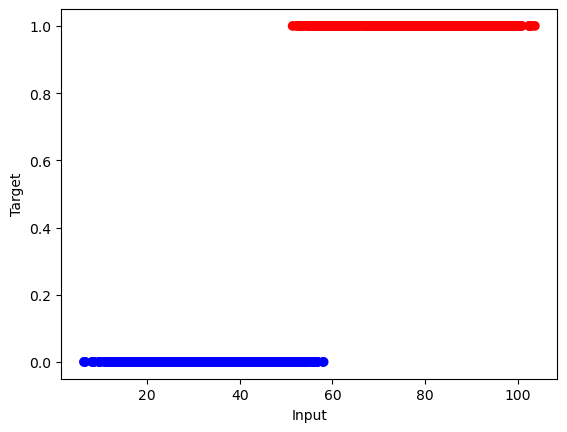

In [5]:
# scatter plot of the data

fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["blue", "red"])
ax.scatter(df['input'], df['target'], c=colors[np.ravel(df['target'].astype(int))])
ax.set_xlabel('Input')
ax.set_ylabel('Target')
plt.show()

In [6]:
df.describe()

,input,target
count,1000.000000,1000.000000
mean,53.748679,0.466000
std,25.658092,0.499092
min,6.358192,0.000000
25%,32.296775,0.000000
50%,52.238797,0.000000
75%,75.097647,1.000000
max,103.675457,1.000000


### Creating the logistic model that can best fit the data

#### To avoid overfitting, we will use a cross validation approach. This involves randoming splitting the data into a training and test dataset. We will use 75/25 here.

In [7]:
X = df[['input']]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =1)

### Let's save the test and training data to csv files (we may want to use these later)

In [8]:
trainData = X_train.copy()
trainData['target'] = y_train

In [9]:
trainData.head(4)

,input,target
298,9.965751,0
160,84.558547,1
268,71.927583,1
658,36.654420,0


In [10]:
trainData.to_csv('WE02_train_data_set.csv', index = False)

In [11]:
test_data = X_test.copy()
test_data['target'] = y_test

In [12]:
test_data.head(4)

,input,target
507,79.926021,1
818,90.058665,1
452,52.615686,0
368,50.578357,0


In [13]:
test_data.to_csv('WE02_test_data.csv', index=False)

#### Fitting the logistic regression model

In [14]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))

Add a column to the dataframe with the predicted values

In [15]:
df['predicted'] = log_reg.predict(X)
df.head(4)

,input,target,predicted
0,50.336125,0,0
1,12.923572,0,0
2,56.343662,1,1
3,51.999947,0,0


Adding a column for the probability of getting one

In [16]:
df['pred_prob'] = log_reg.predict_proba(X)[:,1]
df.head(4)

,input,target,predicted,pred_prob
0,50.336125,0,0,4.057941e-02
1,12.923572,0,0,2.628319e-13
2,56.343662,1,1,7.271977e-01
3,51.999947,0,0,1.175854e-01


Adding a column to check if the predicted value is correct

In [17]:
df['correct_prediction'] = df['target'] == df['predicted']
df.head(4)

,input,target,predicted,pred_prob,correct_prediction
0,50.336125,0,0,4.057941e-02,True
1,12.923572,0,0,2.628319e-13,True
2,56.343662,1,1,7.271977e-01,True
3,51.999947,0,0,1.175854e-01,True


## Displaying the probability and predicted values

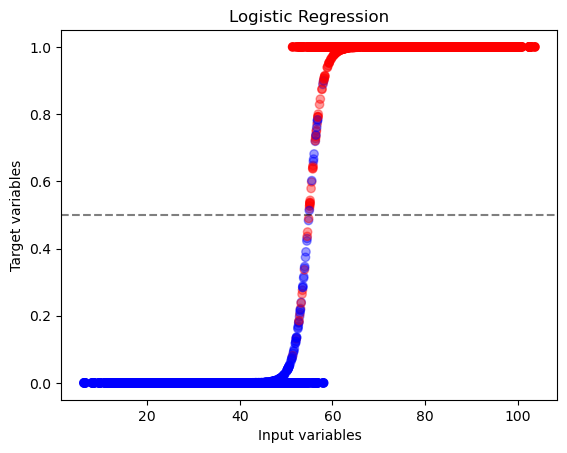

In [18]:

fig = plt.figure()
ax = fig.add_subplot()
#ax.scatter(X, y, c=y.iloc[:,0])
colors = np.array(["blue", "red"])
ax.scatter(X, y, c=colors[np.ravel(y.astype(int))])

ax.scatter(X, df['pred_prob'], c=colors[np.ravel(y.astype(int))], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
ax.set_xlabel('Input variables')
ax.set_ylabel('Target variables')
ax.set_title('Logistic Regression')
plt.show()

Identify the coefficients and intercept.

In [19]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
r2 = log_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1")
print(f"R^2: {r2:.3f}")

Y = -37.88 + 0.69x1
R^2: 0.974


In [20]:
# What percentage of times did this model correctly predict the outcome?
df['correct_prediction'].sum() / df.shape[0]

0.974

### INTERPRETATION OF THE LOGISTIC REGRESSION MODEL

How to interpret the coefficients of a logistic regression model?
NOTE: This section is advanced. I will not test you on this, I only offer this to those who are interested in learning more about the math behind logistic regression.

The b1 coefficient is the change in the log odds of being a 1 for a 1 unit increase in the predictor variable.

The log odds function is the natural log of the odds. It's also known as the logit function.

log(𝑝1−𝑝)=logit(𝑝)
 
Based on the results from our logistic regression above, we can see that the coefficient for kgs smoked is 0.27. This means that for a 1 unit increase in kgs smoked, the log odds of being a 1 increases by 0.0.27.

NOTE: The  𝛽0
  and  𝛽1
  used here are from a specific dataset. If you experiment with other datasets, you will get different values for the coefficients and intercept than you see here. Whatever the new values, the following explanation will still apply.

logit(𝑝)=log(𝑝1−𝑝)=1.31+0.27𝑥
 
But how to we find the probability of being a 1? We can use the inverse logit function (aka, logistic function).

Derive the predicted probability from the logistic model
The logit function is defined as

logit(𝑝)=log(𝑝1−𝑝)
 
The logistic function, is defined as

logistic(𝑝)=1𝑒𝛽0+𝛽1𝑥
 
When we use logistic regression (just as in regular regression), we are trying to find the best values for  𝛽0
  and  𝛽1
  that minimize the error between the predicted values and the actual values. But the interpretation of the coefficients is different.

logit(𝑝)=log(𝑝1−𝑝)=𝛽0+𝛽1𝑥
 
For illustration, take this relationship and derive the function for the probability of being a 1.
Exponentiate and take the multiplicative inverse of both sides, and we get the odds ratio.

1−𝑝𝑝=1𝑒𝛽0+𝛽1𝑥
 
Partial out the fraction on the left-hand side of the equation and add one to both sides,

1𝑝=1+1𝑒𝛽0+𝛽1𝑥
 
Change 1 to a common denominator

1𝑝=𝑒𝛽0+𝛽1𝑥+1𝑒𝛽0+𝛽1𝑥
 
Finally, take the multiplicative inverse again to obtain the formula for the probability P(cancer=1)

𝑝=𝑒𝛽0+𝛽1𝑥1+𝑒𝛽0+𝛽1𝑥
 
Now, let's apply our derived formular to the coefficients we obtained from the model. This will result in the probability of being a 1 for a given value of the predictor variable.

In [21]:
p_y_eq_1 = np.exp(b0 + b1 * X) / (1+ np.exp(b0 + b1 * X))
p_y_eq_1

,input
0,4.057941e-02
1,2.628319e-13
2,7.271977e-01
3,1.175854e-01
4,1.314302e-01
...,...
995,9.943729e-01
996,1.802135e-03
997,9.999992e-01
998,1.000000e+00


Notice that these values are the same as the ones produced by the predict_proba method.

In [22]:
df.pred_prob

0      4.057941e-02
1      2.628319e-13
2      7.271977e-01
3      1.175854e-01
4      1.314302e-01
           ...     
995    9.943729e-01
996    1.802135e-03
997    9.999992e-01
998    1.000000e+00
999    9.999999e-01
Name: pred_prob, Length: 1000, dtype: float64

### MODEL EVALUATION

In [23]:
Xtest = test_data[['input']]
ytest = test_data[['target']]

In [24]:
test_data.head(4)

,input,target
507,79.926021,1
818,90.058665,1
452,52.615686,0
368,50.578357,0


In [25]:
model_preds = log_reg.predict(Xtest)

In [26]:
c_matrix = confusion_matrix(ytest, model_preds)
c_matrix

array([[131,   2],
       [  3, 114]])

In [27]:
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [28]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

In [29]:
print(f'{"Accuracy:":12s}{accuracy:.2f}')
print(f'{"Precision:":12s}{precision:.2f}')
print(f'{"Recall:":12s}{recall:>.2f}')
print(f'{"F1:":12s}{f1:>.2f}')

Accuracy:   0.98
Precision:  0.98
Recall:     0.97
F1:         0.98


### CONCLUSION

From the above results, we only have one false negative prediction which indicates that our model has predicted one false scenario incorrectly. But the model is able to achieve excellent fit in predicting the false positive and true scenarios

Based on the evaluation metrics from our confusion matrix, we can draw the following general conclusion:

The classification model has excellent performance based on the calculated metrics. 

The accuracy of 1.00 suggests that the model has accurately predicted the class labels for all instances in the dataset. This indicates a perfect match between the predicted and actual values.

The precision of 1.00 implies that when the model predicted a positive class, it is almost always correct. There are no false positives, meaning that all instances predicted as positive are indeed positive. 

The recall of 0.99 indicates that the model has successfully captured a high proportion of positive instances. There was only one false negative, which indicates that model missed one positive instance. 

The F1 score of 1.00, which is the harmonic mean of precision and recall, reflects the balanced performance between precision and recall. The score indicates a highly accurate and reliable model.

Overall, we can imply that the model is performing exceptionally well, demonstrating high accuracy, precision, recall, and F1 score. But, it is important to consider the specific context to ensure that the model meets the desired requirements.
